In [1]:
### Do the imports -- no need to change this
import numpy as np
from typing import List
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import sys

In [2]:
import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 10)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
torch.manual_seed(0)

import base64, io

# For visualization
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display
import glob

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:

env = gym.make('CartPole-v0')
seed = 0
env.reset(seed=seed)

c:\Users\Noé\Documents\EPFL\RL\project\RLHF_EGGang\.venv\Lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


(array([ 0.01369617, -0.02302133, -0.04590265, -0.04834723], dtype=float32),
 {})

In [5]:
class Policy(nn.Module): # define the policy network
    def __init__(self, state_size=4, action_size=2, hidden_size=32):
        super(Policy, self).__init__()
        self.fc1 = nn.Linear(state_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, action_size)

    def forward(self, state):
        x = F.relu(self.fc1(state))
        x = self.fc2(x)
        return F.softmax(x, dim=1) # we just consider 1 dimensional probability of action

    def act(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        probs = self.forward(state).cpu()
        model = Categorical(probs)
        action = model.sample()
        return action.item(), model.log_prob(action)
    

# Testing baselines for REINFORCE

In [6]:
from utils.baselines import naive_baseline, baseline_1, baseline_2

from utils.reinforce import reinforce_rwd2go, reinforce_rwd2go_baseline

In [7]:
np.bool8 = bool

# naive baseline
policy_naive_baseline = Policy().to(device)
optimizer_naive_baseline = optim.Adam(policy_naive_baseline.parameters(), lr=1e-2)
scores_naive_baseline, _, _ = reinforce_rwd2go_baseline(policy_naive_baseline, optimizer_naive_baseline, seed=seed, baseline=naive_baseline, env=env, early_stop=True, n_episodes=200)

env = gym.make('CartPole-v0')


# baseline 1
policy_baseline_1 = Policy().to(device)
optimizer_baseline_1 = optim.Adam(policy_baseline_1.parameters(), lr=1e-2)
scores_baseline_1, _, _ = reinforce_rwd2go_baseline(policy_baseline_1, optimizer_baseline_1, seed=seed, baseline=baseline_1, env=env, early_stop=True, n_episodes=200)

env = gym.make('CartPole-v0')

# baseline 2
policy_baseline_2 = Policy().to(device)
optimizer_baseline_2 = optim.Adam(policy_baseline_2.parameters(), lr=1e-2)
scores_baseline_2, _, _ = reinforce_rwd2go_baseline(policy_baseline_2, optimizer_baseline_2, seed=seed, baseline=baseline_2, env=env, early_stop=True, n_episodes=200)


Episode 100	Average Score: 42.97
Environment solved in 53 episodes!	Average Score: 195.89


c:\Users\Noé\Documents\EPFL\RL\project\RLHF_EGGang\.venv\Lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


Episode 100	Average Score: 71.03
Episode 100	Average Score: 60.60


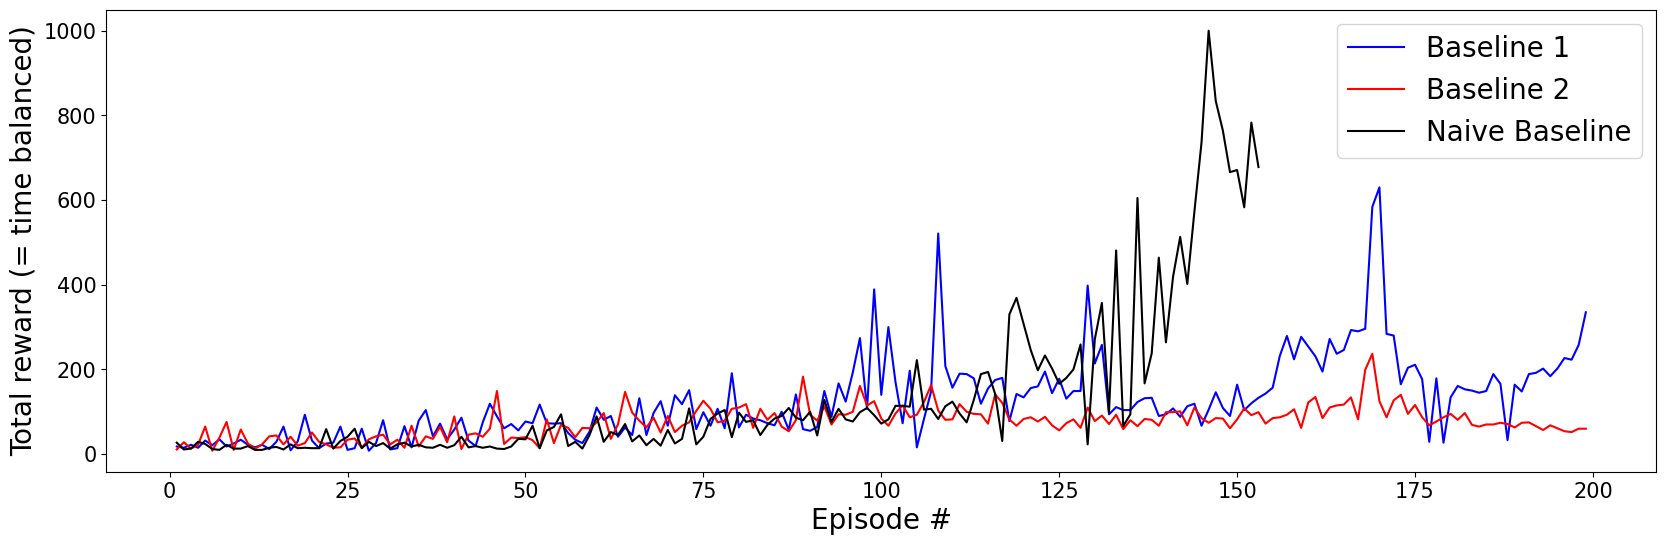

In [8]:
### Plot the learning progress

# Create the plot
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)

# Plot the scores with specified colors and labels
#ax.plot(np.arange(1, len(scores_rwd2go) + 1), scores_rwd2go, color='green', label='No Baseline')
ax.plot(np.arange(1, len(scores_baseline_1) + 1), scores_baseline_1, color='blue', label='Baseline 1')
ax.plot(np.arange(1, len(scores_baseline_2) + 1), scores_baseline_2, color='red', label='Baseline 2')
ax.plot(np.arange(1, len(scores_naive_baseline) + 1), scores_naive_baseline, color='black', label='Naive Baseline')

# Set the labels with a larger font size
ax.set_ylabel('Total reward (= time balanced)', fontsize=20)
ax.set_xlabel('Episode #', fontsize=20)

# Set the tick labels to a larger font size
ax.tick_params(axis='both', which='major', labelsize=15)

# Add a legend with a specified font size
ax.legend(fontsize=20)

# Show the plot
plt.show()

# Generating the preference dataset

In [9]:
from utils.generate_preference_dataset import generate_trajectories


In [ ]:
# Policy saving

np.bool8 = bool
seed = 0
env = gym.make('CartPole-v0')
env.reset(seed=seed)
target_score = 50

example_policy = Policy().to(device)
optimizer_baseline_1 = optim.Adam(example_policy.parameters(), lr=1e-2)
example_scores, example_policy, example_checkpoint_policy = reinforce_rwd2go_baseline(example_policy, optimizer_baseline_1, seed=seed, env=env, target_score=target_score, baseline=naive_baseline, early_stop=False, n_episodes=2500, max_t=1000, print_every=200)

Episode 100	Average Score: 22.54
Episode 200	Average Score: 160.40
Episode 300	Average Score: 119.12
Episode 400	Average Score: 30.72
Episode 500	Average Score: 33.57
Episode 600	Average Score: 40.60
Episode 700	Average Score: 59.51
Episode 800	Average Score: 111.60
Episode 900	Average Score: 158.55
Episode 1000	Average Score: 138.06
Episode 1100	Average Score: 276.48
Episode 1200	Average Score: 113.15
Episode 1300	Average Score: 128.39
Episode 1400	Average Score: 279.55
Episode 1500	Average Score: 1000.00
Episode 1600	Average Score: 1000.00
Episode 1700	Average Score: 835.41
Episode 1800	Average Score: 608.22
Episode 1900	Average Score: 1000.00
Episode 2000	Average Score: 753.48
Episode 2100	Average Score: 44.22
Episode 2200	Average Score: 983.03
Episode 2300	Average Score: 998.04
Episode 2400	Average Score: 1000.00
Episode 2500	Average Score: 1000.00
Episode 2600	Average Score: 1000.00
Episode 2700	Average Score: 976.07
Episode 2800	Average Score: 577.14
Episode 2900	Average Score: 1

In [12]:
# Generate preference dataset
pref_dataset_size = 5000

env = gym.make('CartPole-v0')
trajectories_rewards_pi1, trajectories_states_pi1 = generate_trajectories(example_policy, pref_dataset_size, env=env, max_t=1000, seed = seed, dim_state=4)

env = gym.make('CartPole-v0')
trajectories_rewards_pi2, trajectories_states_pi2 = generate_trajectories(example_checkpoint_policy, pref_dataset_size, env=env, max_t=1000, seed = seed, dim_state=4)



In [13]:
avg_pi1 = np.mean(trajectories_rewards_pi1)
avg_pi2 = np.mean(trajectories_rewards_pi2)
print(avg_pi1, avg_pi2)

120.2466 120.1912


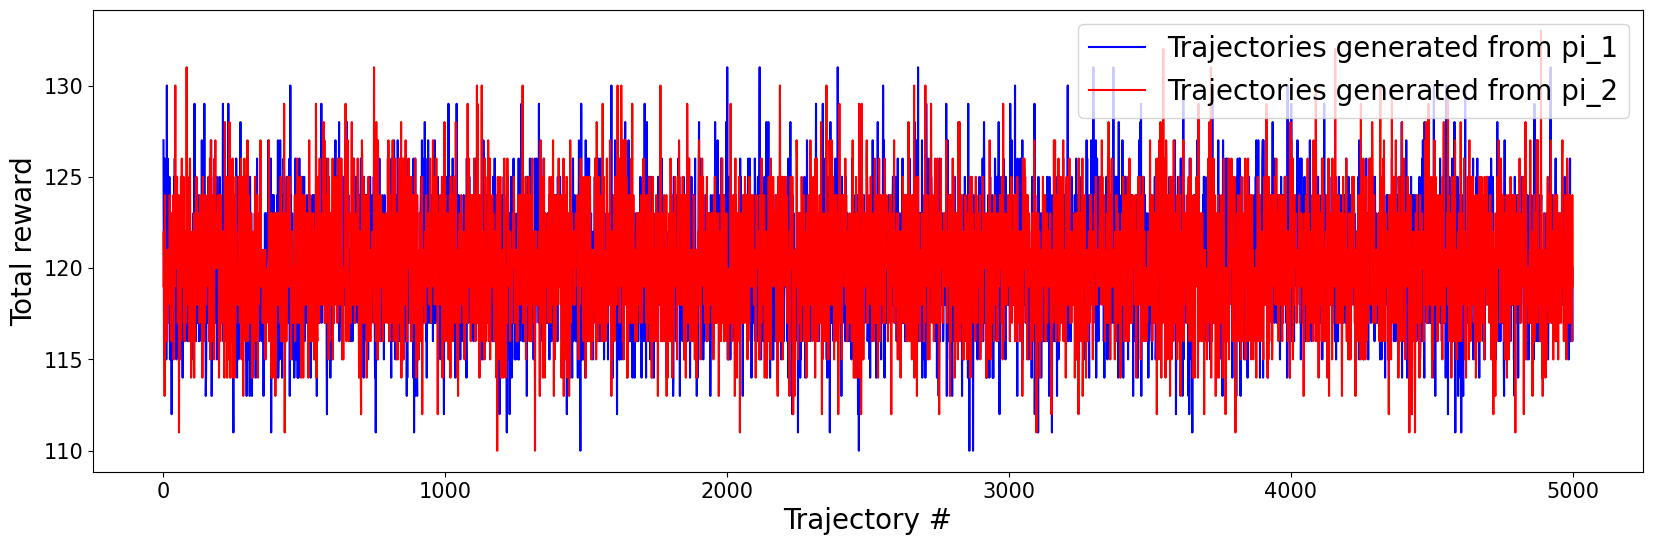

In [14]:
### Plot the learning progress

# Create the plot
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)

# Plot the scores with specified colors and labels
#ax.plot(np.arange(1, len(scores_rwd2go) + 1), scores_rwd2go, color='green', label='No Baseline')
ax.plot(np.arange(1, len(trajectories_rewards_pi1) + 1), trajectories_rewards_pi1, color='blue', label='Trajectories generated from pi_1')
ax.plot(np.arange(1, len(trajectories_rewards_pi2) + 1), trajectories_rewards_pi2, color='red', label='Trajectories generated from pi_2')

# Set the labels with a larger font size
ax.set_ylabel('Total reward', fontsize=20)
ax.set_xlabel('Trajectory #', fontsize=20)

# Set the tick labels to a larger font size
ax.tick_params(axis='both', which='major', labelsize=15)

# Add a legend with a specified font size
ax.legend(fontsize=20)

# Show the plot
plt.show()